### Team members: Kiran Prabhakar, Shishir Suvarna
### UBIT Name: shishirs
### Person Number: 50290573
### Team mate UBIT Name: kprabhak
### Team mate Person Number: 50287403

## Part 3:

### Task 4: Comparing the twitter data with all keywords VS CDC data

In [1]:
options(warn=-1) # Excludes the warnings


Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



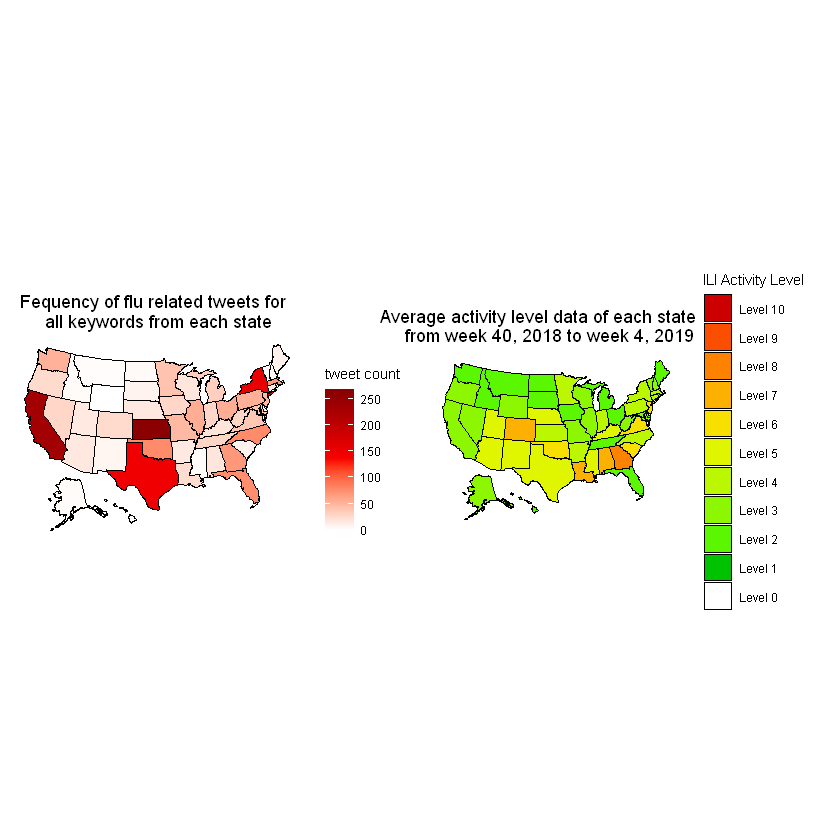

In [2]:
# Choose AllTweets.csv first and CDCData.csv laster when file selection window is prompted
library(datasets)
library(gridExtra)
library(ggplot2)
library(usmap)
library(ggplot2)
library(usmap)
library(ggplot2)
library(dplyr)

data_frame <- read.csv('AllTweets.csv')

state_name_df <- as.data.frame(state.name)
colnames(state_name_df) <- c('Var1')

freq_data <- as.data.frame(table(data_frame$state))

freq_data <-merge(state_name_df, freq_data, by='Var1', all.x = TRUE)
freq_data$Freq[which(is.na(freq_data$Freq))] <- 0

states <- freq_data$Var1
freq <- freq_data$Freq


code <- fips(states)
value <-freq
df_left <- data.frame("fips" = code, "Frequency" = value)
df_left <- df_left[which(!is.na(df_left$fips)), ]
  
left <- plot_usmap(data = df_left, values = "Frequency", lines = "black")+
  scale_fill_gradient2(low="#ffffff", mid="red", high="darkred",midpoint=(max(df_left$Frequency)+min(df_left$Frequency))/2,
                       limits=range(df_left$Frequency),name = "tweet count")+
  labs(title = "Fequency of flu related tweets for \n all keywords from each state")+
  theme(legend.position = "right", plot.title = element_text(hjust=0.5))


heatmapData <- read.csv('CDCData.csv')
heatmapData <- heatmapData[grep("Level ", heatmapData$ACTIVITY.LEVEL),]
heatmapData$LevelInt <- as.integer(substr(heatmapData$ACTIVITY.LEVEL, 7, 9))
agreegated_data <- aggregate(heatmapData, by = list(heatmapData$STATENAME), FUN = mean)
agreegated_data$LevelInt <- ceiling(agreegated_data$LevelInt)
agreegated_data$LevelInt <- paste("Level", agreegated_data$LevelInt)

code <- fips(agreegated_data[, c('Group.1')])
value <- agreegated_data$LevelInt
df <- data.frame("fips" = code, "LevelInt" = value)

pal <- c(
  "Level 10" = "#CC0000",
  "Level 9" = "#FA4F00",
  "Level 8" = "#FC8200",
  "Level 7" = "#FCB100",
  "Level 6" = "#F7DF00",
  "Level 5" = "#E0F500",
  "Level 4" = "#BAF700",
  "Level 3" = "#8CF700",
  "Level 2" = "#5BF700",
  "Level 1" = "#00C200",
  "Level 0" = "#ffffff"
  
)   
right <- plot_usmap(data = df, values = "LevelInt", lines = "black")+
  scale_fill_manual(values = pal, limits = names(pal), name='ILI Activity Level')+
  labs(title = "Average activity level data of each state \n from week 40, 2018 to week 4, 2019")+
  theme(legend.position = "right", plot.title = element_text(hjust=0.7))

grid.arrange(left,right, ncol=2)



### Task 5: Comparing tweets with Influenza and flushot keywords VS CDC data

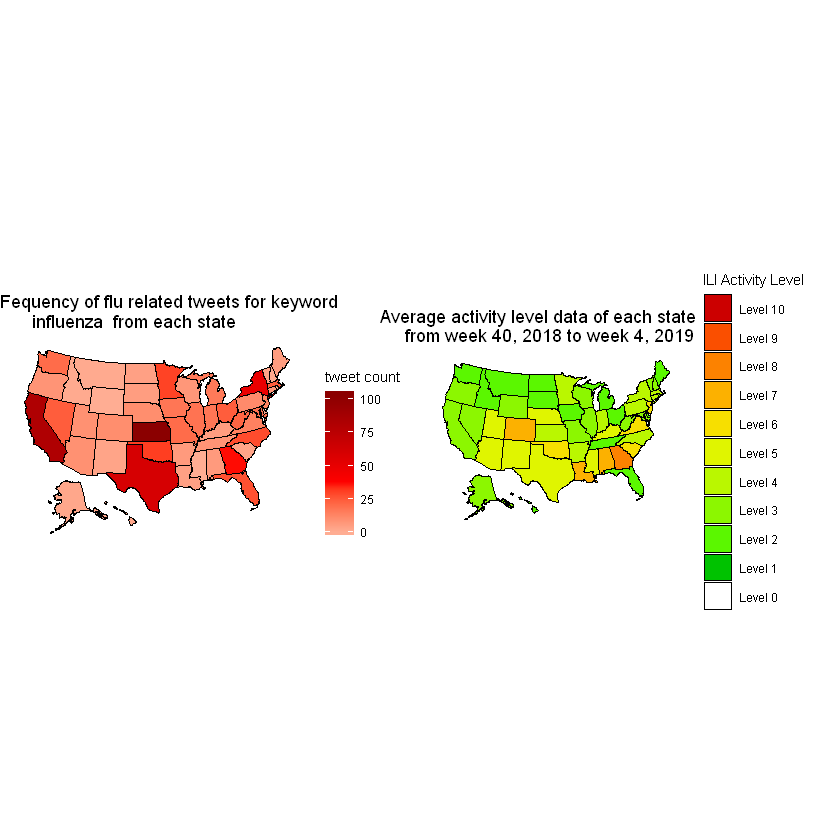

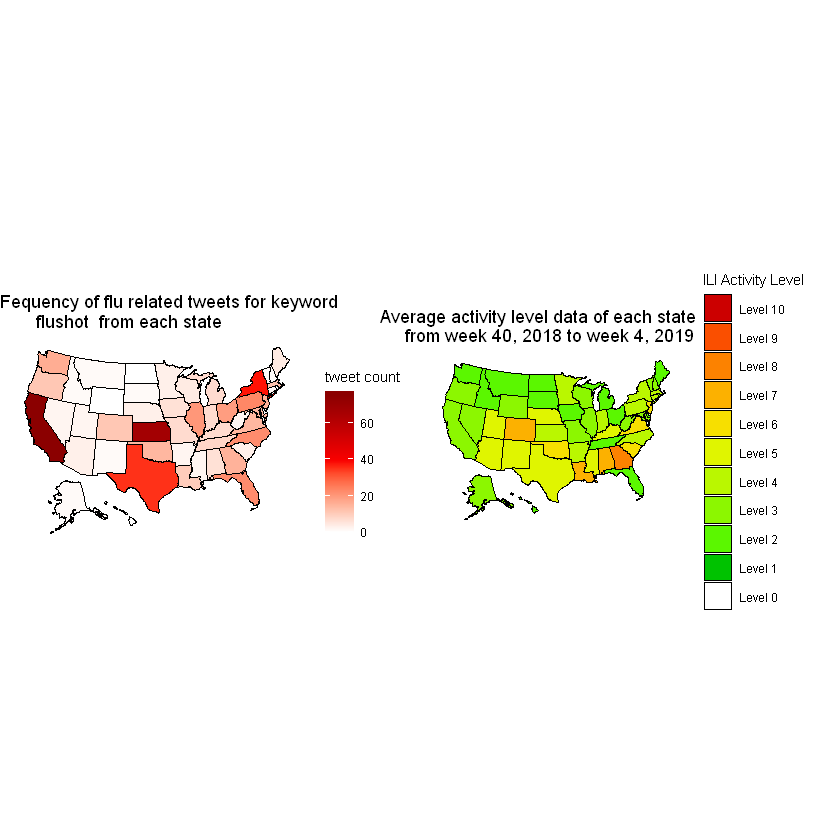

In [3]:
# Choose AllTweets.csv first and CDCData.csv laster when file selection window is prompted

library(datasets)
library(gridExtra)
library(ggplot2)
library(usmap)
library(ggplot2)
library(usmap)
library(ggplot2)
library(dplyr)


data_frame_all <- read.csv('AllTweets.csv')

left <- c()
keywords <- c('influenza', 'flushot')
for(i in c(1:2)){
  data_frame <- data_frame_all[which(data_frame_all$queryMetadata.query == keywords[i]), ]
  
  state_name_df <- as.data.frame(state.name)
  colnames(state_name_df) <- c('Var1')
  
  freq_data <- as.data.frame(table(data_frame$state))
  
  freq_data <-merge(state_name_df, freq_data, by='Var1', all.x = TRUE)
  freq_data$Freq[which(is.na(freq_data$Freq))] <- 0
  
  states <- freq_data$Var1
  freq <- freq_data$Freq
  
  
  code <- fips(states)
  value <-freq
  df_left <- data.frame("fips" = code, "Frequency" = value)
  df_left <- df_left[which(!is.na(df_left$fips)), ]
  
  if(i==1){
    left1 <- plot_usmap(data = df_left, values = "Frequency", lines = "black")+
      scale_fill_gradient2(low="#ffffff", mid="red", high="darkred",midpoint=(max(df_left$Frequency)+min(df_left$Frequency))/2,
                           limits=range(df_left$Frequency),name = "tweet count")+
      labs(title = paste("Fequency of flu related tweets for keyword \n", keywords[i], " from each state"))+
      theme(legend.position = "right", plot.title = element_text(hjust=0.2))
  }
  if(i==2){
    left2 <- plot_usmap(data = df_left, values = "Frequency", lines = "black")+
      scale_fill_gradient2(low="#ffffff", mid="red", high="darkred",midpoint=(max(df_left$Frequency)+min(df_left$Frequency))/2,
                           limits=range(df_left$Frequency),name = "tweet count")+
      labs(title = paste("Fequency of flu related tweets for keyword \n", keywords[i], " from each state"))+
      theme(legend.position = "right", plot.title = element_text(hjust=0.2))
  }
  
}

heatmapData <- read.csv('CDCData.csv')
heatmapData <- heatmapData[grep("Level ", heatmapData$ACTIVITY.LEVEL),]
heatmapData$LevelInt <- as.integer(substr(heatmapData$ACTIVITY.LEVEL, 7, 9))
agreegated_data <- aggregate(heatmapData, by = list(heatmapData$STATENAME), FUN = mean)
agreegated_data$LevelInt <- ceiling(agreegated_data$LevelInt)
agreegated_data$LevelInt <- paste("Level", agreegated_data$LevelInt)

code <- fips(agreegated_data[, c('Group.1')])
value <- agreegated_data$LevelInt
df <- data.frame("fips" = code, "LevelInt" = value)

pal <- c(
  "Level 10" = "#CC0000",
  "Level 9" = "#FA4F00",
  "Level 8" = "#FC8200",
  "Level 7" = "#FCB100",
  "Level 6" = "#F7DF00",
  "Level 5" = "#E0F500",
  "Level 4" = "#BAF700",
  "Level 3" = "#8CF700",
  "Level 2" = "#5BF700",
  "Level 1" = "#00C200",
  "Level 0" = "#ffffff"
)
right <- plot_usmap(data = df, values = "LevelInt", lines = "black")+
  scale_fill_manual(values = pal, limits = names(pal), name='ILI Activity Level')+
  labs(title = "Average activity level data of each state \n from week 40, 2018 to week 4, 2019")+
  theme(legend.position = "right", plot.title = element_text(hjust=0.7))

grid.arrange(left1,right, ncol=2)
grid.arrange(left2,right, ncol=2)




## Task 7: Results are published in Shiny Application
## https://kprabhak-shishirs.shinyapps.io/Shiny/


### From the above plots we infer that, there is no direct relation between CDC data and twitter data. However, the tweets related to flushot and Influenza are high in more populated states like California and Texas. It can be observed that the count of  flu related tweets doesn't increase the flu activity level.


### Submission folder details
#### CollectTweets_RApproach.R, CombineAllCSVTweetfiles.R, Tweets.R contains code to collect, combine and proces tweets
### Shiny Folder:
#### contains all the files, images(inside www folder) needed to publish the application.
### Tweets Folder:
#### contains all tweetes collected in .csv format
### AllTweets.csv: Contains combined tweets in single file used for plotting
